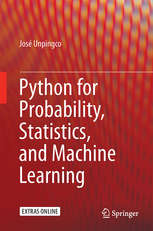

In [131]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [132]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [133]:
from pprint import pprint
import textwrap
import sys, re
old_displayhook = sys.displayhook
def displ(x):
   if x is None: return
   print "\n".join(textwrap.wrap(repr(x).replace(' ',''),width=80))

sys.displayhook=displ

So far, we have considered parametric methods that reduce inference
or prediction to parameter-fitting. However, for these to work, we had to
assume a specific functional form for the unknown probability distribution of
the data. Nonparametric methods eliminate the need to assume a specific
functional form by generalizing to classes of functions.

## Kernel Density Estimation

We have already made heavy use of this method with the histogram, which is a
special case of kernel density estimation.  The histogram can be considered the
crudest and most useful nonparametric method, that estimates the underlying
probability distribution of the data.

To be formal and place the histogram on the same footing as our earlier
estimations, suppose that $\mathscr{X}=[0,1]^d$ is the $d$ dimensional unit
cube and that $h$ is the *bandwidth* or size of a *bin* or sub-cube. Then,
there are $N\approx(1/h)^d$ such bins, each with volume $h^d$, $\lbrace
B_1,B_2,\ldots,B_N \rbrace$. With all this in place, we can write the histogram
has a probability density estimator of the form,

$$
\hat{p}_h(x) = \sum_{k=1}^N \frac{\hat{\theta}_k}{h} I(x\in B_k)
$$

 where

$$
\hat{\theta}_k=\frac{1}{n} \sum_{j=1}^n I(X_j\in B_k)
$$

 is the fraction of data points ($X_k$) in each bin, $B_k$. We want to
bound the bias and variance of $\hat{p}_h(x)$. Keep in mind that we are trying
to estimate a function of $x$, but the set of all possible probability
distribution functions is extremely large and hard to manage. Thus, we need
to restrict our attention to the following class of probability distribution of
so-called Lipschitz functions,

$$
\mathscr{P}(L) = \lbrace p\colon \vert p(x)-p(y)\vert \le L \Vert x-y\Vert, \forall \: x,y \rbrace
$$

 Roughly speaking, these are the density
functions whose slopes (i.e., growth rates)  are bounded by $L$.
It turns out that the bias of the histogram estimator is bounded in the
following way,

$$
\int\vert p(x)-\mathbb{E}(\hat{p}_h(x))\vert dx \le L h\sqrt{d}
$$

  Similarly, the variance is bounded by the following,

$$
\mathbb{V}(\hat{p}_h(x)) \le \frac{C}{n h^d}
$$

 for some constant $C$. Putting these two facts together means that the
risk is bounded by,

$$
R(p,\hat{p}) = \int \mathbb{E}(p(x) -\hat{p}_h(x))^2 dx \le L^2 h^2 d + \frac{C}{n h^d}
$$

 This upper bound is minimized by choosing

$$
h = \left(\frac{C}{L^2 n d}\right)^\frac{1}{d+2}
$$

 In particular, this means that,

$$
\sup_{p\in\mathscr{P}(L)} R(p,\hat{p}) \le C_0 \left(\frac{1}{n}\right)^{\frac{2}{d+2}}
$$

 where the constant $C_0$ is a function of $L$. There is a theorem
[[wasserman2004all]](#wasserman2004all) that shows this bound in tight, which basically means
that the histogram is a really powerful probability density estimator for
Lipschitz functions with risk that goes as
$\left(\frac{1}{n}\right)^{\frac{2}{d+2}}$.  Note that this class of functions
is not necessarily smooth because the Lipschitz condition admits step-wise and
other non-smooth functions. While this is a reassuring result, we typically do
not know which function class (Lipschitz or not) a particular probability
belongs to ahead of time.  Nonetheless, the rate at which the risk changes with
both dimension $d$ and $n$ samples would be hard to understand without this
result.  [Figure](#fig:nonparametric_001) shows the probability distribution
function of the $\beta(2,2)$ distribution compared to computed histograms for
different values of $n$. The box plots on each of the points show how the
variation in each bin of the histogram reduces with increasing $n$. The risk
function $R(p,\hat{p})$ above is based upon integrating the squared difference
between the histogram (as a piecewise function of $x$) and the probability
distribution function. 

**Programming Tip.**

The corresponding IPython notebook has the complete source code that generates
[Figure](#fig:nonparametric_001); however, the following snippet
is the main element of the code.

In [134]:
def generate_samples(n,ntrials=500):
    phat = np.zeros((nbins,ntrials))
    for k in range(ntrials):
        d = rv.rvs(n)       
        phat[:,k],_=histogram(d,bins,density=True)   
    return phat

The code uses the `histogram` function from Numpy.
To be consistent with the risk function $R(p,\hat{p})$, we have to make sure
the `bins` keyword argument is formatted correctly using a sequence of
bin-edges instead of just a single integer. Also, the `density=True` keyword
argument normalizes the histogram appropriately so that the comparison between
it and the probability distribution function of the simulated beta distribution
is correctly scaled.



<!-- dom:FIGURE: [fig-statistics/nonparametric_001.png, width=800 frac=0.95]  The box plots on each of the points show how the variation in each bin of the histogram reduces with increasing $n$. <div id="fig:nonparametric_001"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_001"></div>

<p>The box plots on each of the points show how the variation in each bin of the histogram reduces with increasing $n$.</p>
<img src="fig-statistics/nonparametric_001.png" width=800>

<!-- end figure -->


## Kernel Smoothing

We can extend our methods to other function classes using kernel functions.
A one-dimensional smoothing kernel is a smooth function $K$ with 
the following properties,

$$
\begin{align*}
\int K(x) dx &= 1 \\\
\int x K(x) dx &= 0 \\\
0< \int x^2 K(x) dx &< \infty \\\
\end{align*}
$$

 For example, $K(x)=I(x)/2$ is the boxcar kernel, where $I(x)=1$
when $\vert x\vert\le 1$ and zero otherwise. The kernel density estimator is
very similar to the histogram, except now we put a kernel function on every
point as in the following,

$$
\hat{p}(x)=\frac{1}{n}\sum_{i=1}^n \frac{1}{h^d} K\left(\frac{\Vert x-X_i\Vert}{h}\right)
$$

 where $X\in \mathbb{R}^d$. [Figure](#fig:nonparametric_002) shows an
example of a kernel density estimate using a Gaussian kernel function,
$K(x)=e^{-x^2/2}/\sqrt{2\pi}$. There are  five data points shown by the
vertical lines in the upper panel. The dotted lines show the individual $K(x)$
function at each of the data points. The lower panel shows the overall kernel
density estimate, which is the scaled sum of the upper panel.

There is an important technical result in [[wasserman2004all]](#wasserman2004all) that
states that kernel density estimators are minimax in the sense we
discussed in the maximum likelihood the section ref{ch:stats:sec:mle}. In
broad strokes, this means that the analogous risk for the kernel
density estimator is approximately bounded by the following factor,

$$
R(p,\hat{p}) \lesssim n^{-\frac{2 m}{2 m+d}}
$$

 for some constant $C$ where $m$ is a factor related to bounding
the derivatives of the probability density function. For example, if the second
derivative of the density function is bounded, then $m=2$. This means that
the convergence rate for this estimator decreases with increasing dimension
$d$.

<!-- dom:FIGURE: [fig-statistics/nonparametric_002.png, width=800 frac=0.95]  The upper panel shows the individual kernel functions placed at each of the data points. The lower panel shows the composite kernel density estimate which is the sum of the individual functions in the upper panel. <div id="fig:nonparametric_002"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_002"></div>

<p>The upper panel shows the individual kernel functions placed at each of the data points. The lower panel shows the composite kernel density estimate which is the sum of the individual functions in the upper panel.</p>
<img src="fig-statistics/nonparametric_002.png" width=800>

<!-- end figure -->


### Cross-Validation

As a practical matter, the tricky part of the kernel density estimator (which
includes the histogram as a special case) is that we need to somehow compute
the bandwith $h$ term using data. There are several rule-of-thumb methods that
for some common kernels, including Silverman's rule and Scott's rule for
Gaussian kernels. For example, Scott's factor is to simply compute $h=n^{
-1/(d+4) }$ and Silverman's is $h=(n (d+2)/4)^{ (-1/(d+4)) }$. Rules of
this kind are derived by assuming the underlying probability density
function is of a certain family (e.g., Gaussian), and then deriving the
best $h$ for a certain type of kernel density estimator, usually equipped
with extra functional properties (say, continuous derivatives of a
certain order). In practice, these rules seem to work pretty well,
especially for uni-modal probability density functions.  Avoiding these
kinds of assumptions means computing the bandwith from data directly and that is where
cross validation comes in.

Cross-validation is a method to estimate the bandwidth from the data itself.
The idea is to write out the following Integrated Squared Error (ISE),

$$
\begin{align*}
\texttt{ISE}(\hat{p}_h,p)&=\int (p(x)-\hat{p}_h(x))^2 dx\\\
                             &= \int \hat{p}_h(x)^2 dx - 2\int p(x) \hat{p}_h dx + \int p(x)^2 dx 
\end{align*}
$$

 The problem with this expression is the middle term [^last_term],

[^last_term]: The last term is of no interest because we are
only interested in relative changes in the ISE.

$$
\int p(x)\hat{p}_h dx
$$

 where $p(x)$ is what we are trying to estimate with $\hat{p}_h$. The
form of the last expression looks like an expectation of $\hat{p}_h$ over the
density of $p(x)$, $\mathbb{E}(\hat{p}_h)$. The approach is to
approximate this with the mean,

$$
\mathbb{E}(\hat{p}_h) \approx \frac{1}{n}\sum_{i=1}^n \hat{p}_h(X_i)
$$

 The problem with this approach is that $\hat{p}_h$ is computed using
the same data that the approximation utilizes.  The way to get around this is
to split the data into two equally sized chunks $D_1$, $D_2$; and then compute
$\hat{p}_h$ for a sequence of different $h$ values over the $D_1$ set. Then,
when we apply the above approximation for the data ($Z_i$) in the $D_2$ set,

$$
\mathbb{E}(\hat{p}_h) \approx \frac{1}{\vert D_2\vert}\sum_{Z_i\in D_2} \hat{p}_h(Z_i)
$$

  Plugging this approximation back into the integrated squared error
provides the objective function,

$$
\texttt{ISE}\approx \int \hat{p}_h(x)^2 dx-\frac{2}{\vert D_2\vert}\sum_{Z_i\in D_2} \hat{p}_h(Z_i)
$$

 Some code will make these steps concrete. We will need some tools from
Scikit-learn.

In [135]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors.kde import KernelDensity

 The `train_test_split` function makes it easy to split and
keep track of the $D_1$ and $D_2$ sets we need for cross validation. Scikit-learn
already has a powerful and flexible implementation of kernel density estimators.
To compute the objective function, we need some
basic numerical integration tools from Scipy. For this example, we
will generate samples from a $\beta(2,2)$ distribution, which is
implemented in the `stats` submodule in Scipy.

In [136]:
import numpy as np
np.random.seed(123456)

In [137]:
from scipy.integrate import quad
from scipy import stats
rv= stats.beta(2,2)
n=100                 # number of samples to generate
d = rv.rvs(n)[:,None] # generate samples as column-vector

**Programming Tip.**

The use of the `[:,None]` in the last line formats the Numpy array returned by
the `rvs` function into a Numpy vector with a column dimension of one. This is
required by the `KernelDensity` constructor because the column dimension is
used for different features (in general) for Scikit-learn. Thus, even though we
only have one feature, we still need to comply with the structured input that
Scikit-learn relies upon. There are many ways to inject the additional
dimension other than using `None`. For example, the more cryptic, `np.c_`, or
the less cryptic `[:,np.newaxis]` can do the same, as can the `np.reshape`
function.



 The next step is to split the data into two  halves and loop over
each of the $h_i$ bandwidths to create a separate kernel density estimator
based on the $D_1$ data,

In [138]:
train,test,_,_=train_test_split(d,d,test_size=0.5)
kdes=[KernelDensity(bandwidth=i).fit(train) 
        for i in [.05,0.1,0.2,0.3]]

**Programming Tip.**

Note that the single underscore symbol in Python refers to the last evaluated
result.  the above code unpacks the tuple returned by `train_test_split` into
four elements.  Because we are only interested in the first two, we assign the
last two to the underscore symbol. This is a stylistic usage to make it clear
to the reader that the last two elements of the tuple are unused.
Alternatively, we could assign the last two elements to a pair of dummy
variables that we do not use later, but then  the reader skimming the code may
think that those dummy variables are relevant.



 The last step is to loop over the so-created kernel density estimators
and compute the objective function.

In [139]:
import numpy as np
for i in kdes:
    f = lambda x: np.exp(i.score_samples(x))
    f2 = lambda x: f(x)**2
    print 'h=%3.2f\t %3.4f'%(i.bandwidth,quad(f2,0,1)[0]
                             -2*np.mean(f(test)))

h=0.05	 -1.1323
h=0.10	 -1.1336
h=0.20	 -1.1330
h=0.30	 -1.0810


**Programming Tip.**

The lambda functions defined in the last block are necessary because
Scikit-learn implements the return value of the kernel density estimator as a
logarithm via the `score_samples` function. The numerical quadrature function
`quad` from Scipy computes the $\int \hat{p}_h(x)^2 dx$ part of the objective
function.

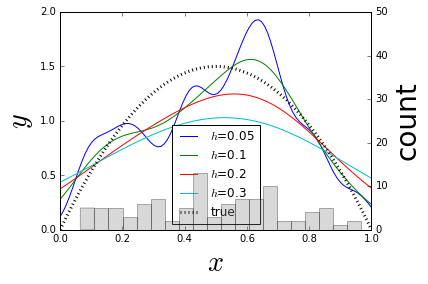

In [140]:
%matplotlib inline

from __future__ import division
from matplotlib.pylab import subplots
fig,ax=subplots()
xi = np.linspace(0,1,100)[:,None]
for i in kdes:
    f=lambda x: np.exp(i.score_samples(x))
    f2 = lambda x: f(x)**2
    _=ax.plot(xi,f(xi),label='$h$='+str(i.bandwidth))

_=ax.set_xlabel('$x$',fontsize=28)
_=ax.set_ylabel('$y$',fontsize=28)
_=ax.plot(xi,rv.pdf(xi),'k:',lw=3,label='true')
_=ax.legend(loc=0)
ax2 = ax.twinx()
_=ax2.hist(d,20,alpha=.3,color='gray')
_=ax2.axis(ymax=50)
_=ax2.set_ylabel('count',fontsize=28)
fig.tight_layout()
#fig.savefig('fig-statistics/nonparametric_003.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_003.png, width=800 frac=0.85]  Each line above is a different kernel density estimator for the given bandwidth as an approximation to the true density function. A plain histogram is imprinted on the bottom for reference.  <div id="fig:nonparametric_003"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_003"></div>

<p>Each line above is a different kernel density estimator for the given bandwidth as an approximation to the true density function. A plain histogram is imprinted on the bottom for reference.</p>
<img src="fig-statistics/nonparametric_003.png" width=800>

<!-- end figure -->


Scikit-learn has many more advanced tools to automate this kind of
hyper-parameter (i.e., kernel density bandwidth) search. To utilize these
advanced tools, we need to format the current problem slightly differently by
defining the following wrapper class.

In [141]:
class KernelDensityWrapper(KernelDensity):
    def predict(self,x):
        return np.exp(self.score_samples(x))
    def score(self,test):
        f = lambda x: self.predict(x)
        f2 = lambda x: f(x)**2
        return -(quad(f2,0,1)[0]-2*np.mean(f(test)))

 This is tantamount to reorganizing the above previous code 
into functions that Scikit-learn requires. Next, we create the
dictionary of parameters we want to search over (`params`) below
and then start the grid search with the `fit` function,

In [142]:
from sklearn.grid_search import GridSearchCV
params = {'bandwidth':np.linspace(0.01,0.5,10)}
clf = GridSearchCV(KernelDensityWrapper(), param_grid=params,cv=2)
clf.fit(d)
print clf.best_params_

{'bandwidth': 0.17333333333333334}


  The grid search iterates over all the elements in the `params`
dictionary and reports the best bandwidth over that list of parameter values.
The `cv` keyword argument above specifies that we want to split the data
into two equally-sized sets for training and testing. We can
also examine the values of the objective function for each point
on the grid as follow,

In [143]:
from pprint import pprint
pprint(clf.grid_scores_)

[mean: 0.60758, std: 0.07695, params: {'bandwidth': 0.01},
 mean: 1.06325, std: 0.03866, params: {'bandwidth': 0.064444444444444443},
 mean: 1.11859, std: 0.02093, params: {'bandwidth': 0.11888888888888888},
 mean: 1.13187, std: 0.01397, params: {'bandwidth': 0.17333333333333334},
 mean: 1.12007, std: 0.01043, params: {'bandwidth': 0.22777777777777777},
 mean: 1.09186, std: 0.00794, params: {'bandwidth': 0.28222222222222221},
 mean: 1.05391, std: 0.00601, params: {'bandwidth': 0.33666666666666667},
 mean: 1.01126, std: 0.00453, params: {'bandwidth': 0.39111111111111108},
 mean: 0.96717, std: 0.00341, params: {'bandwidth': 0.44555555555555554},
 mean: 0.92355, std: 0.00257, params: {'bandwidth': 0.5}]


**Programming Tip.**

The `pprint` function makes the standard output prettier. The only reason for
using it here is to get it to look good on the printed page.  Otherwise, the
IPython notebook handles the visual rendering of output embedded in the
notebook via  its internal `display` framework.



 Keep in mind that the grid search examines multiple folds for cross
validation to compute the above means and standard deviations. Note that there
is also a `RandomizedSearchCV` in case you would rather specify a distribution
of parameters instead of a list. This is particularly useful for searching very
large parameter spaces where an exhaustive grid search would be too
computationally expensive. Although kernel density estimators are easy to
understand and have many attractive analytical properties, they become
practically prohibitive for large, high-dimensional data sets.

## Nonparametric Regression Estimators

Beyond estimating the underlying probability density, we can use nonparametric
methods to compute estimators of the underlying function that is generating the
data.  Nonparametric regression estimators of the following form are known as
linear smoothers,

$$
\hat{y}(x) =  \sum_{i=1}^n \ell_i(x) y_i
$$

 To understand the performance of these smoothers,
we can define the risk as the following,

$$
R(\hat{y},y) = \mathbb{E}\left( \frac{1}{n} \sum_{i=1}^n (\hat{y}(x_i)-y(x_i))^2 \right)
$$

 and find the best $\hat{y}$ that minimizes this. The problem with
this metric is that we do not know $y(x)$, which is why we are trying to
approximate it with $\hat{y}(x)$. We could construct an estimation by using the
data at hand as in the following,

$$
\hat{R}(\hat{y},y) =\frac{1}{n} \sum_{i=1}^n (\hat{y}(x_i)-Y_i)^2
$$

 where we have substituted the data $Y_i$ for the unknown function
value, $y(x_i)$. The problem with this approach is that we are using the data
to estimate the function and then using the same data to evaluate the risk of
doing so. This kind of double-dipping leads to overly optimistic estimators.
One way out of this conundrum is to use leave-one-out cross validation, wherein
the $\hat{y}$ function is estimated using all but one of the data pairs,
$(X_i,Y_i)$. Then, this missing data element is used to estimate the above
risk. Notationally, this is written as the following,

$$
\hat{R}(\hat{y},y) =\frac{1}{n} \sum_{i=1}^n (\hat{y}_{(-i)}(x_i)-Y_i)^2
$$

 where $\hat{y}_{(-i)}$ denotes computing the estimator without using
the $i^{th}$ data pair. Unfortunately, for anything other than relatively small
data sets, it quickly becomes computationally prohibitive to use leave-one-out
cross validation in practice. We'll get back to this issue shortly, but let's
consider a concrete example of such a nonparametric smoother.

## Nearest Neighbors Regression
<div id="ch:stats:sec:nnreg"></div>

The simplest possible nonparametric regression method is the $k$-nearest
neighbors regression. This is easier to explain in words than to write out in
math. Given an input $x$, find the closest one of the $k$ clusters that
contains it and then return the mean of the data values in that cluster. As a
univariate example, let's consider the following *chirp* waveform,

$$
y(x)=\cos\left(2\pi\left(f_o x + \frac{BW x^2}{2\tau}\right)\right)
$$

 This waveform is important in high-resolution radar applications.
The $f_o$ is the start frequency and $BW/\tau$ is the frequency slope of the
signal. For our example, the fact that it is nonuniform over its domain is
important. We can easily create some data by sampling the
chirp as in the following,

In [144]:
import numpy as np
from numpy import cos, pi
xi = np.linspace(0,1,100)[:,None]
xin = np.linspace(0,1,12)[:,None]
f0 = 1 # init frequency
BW = 5
y = cos(2*pi*(f0*xin+(BW/2.0)*xin**2))

 We can use this data to construct a simple nearest neighbor
estimator using Scikit-learn,

In [145]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(2) 
knr.fit(xin,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

**Programming Tip.**

Scikit-learn has a fantastically consistent interface. The `fit` function above
fits the model parameters to the data. The corresponding `predict` function
returns the output of the model given an arbitrary input. We will spend a lot
more time on Scikit-learn in the machine learning chapter. The `[:,None]` part
at the end is just injecting a column dimension into the array in order to
satisfy the dimensional requirements of Scikit-learn.

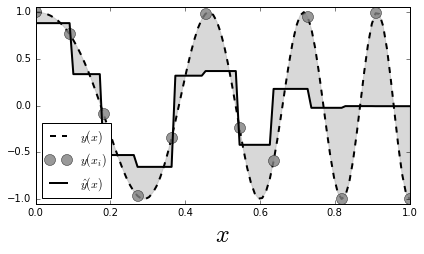

In [146]:
from matplotlib.pylab import subplots
fig,ax=subplots()
yi = cos(2*pi*(f0*xi+(BW/2.0)*xi**2))
_=ax.plot(xi,yi,'k--',lw=2,label=r'$y(x)$')
_=ax.plot(xin,y,'ko',lw=2,ms=11,color='gray',alpha=.8,label='$y(x_i)$')
_=ax.fill_between(xi.flat,yi.flat,knr.predict(xi).flat,color='gray',alpha=.3)
_=ax.plot(xi,knr.predict(xi),'k-',lw=2,label='$\hat{y}(x)$')
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.legend(loc=0)
fig.set_tight_layout(True)
#fig.savefig('fig-statistics/nonparametric_004.png')

<!-- dom:FIGURE: [fig-statistics/nonparametric_004.png, width=800 frac=0.85] The dotted line shows the chirp signal and the solid line shows the nearest neighbor estimate. The gray circles are the sample points that we used to fit the nearest neighbor estimator. The shaded area shows the gaps between the estimator and the unsampled chirp.  <div id="fig:nonparametric_004"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_004"></div>

<p>The dotted line shows the chirp signal and the solid line shows the nearest neighbor estimate. The gray circles are the sample points that we used to fit the nearest neighbor estimator. The shaded area shows the gaps between the estimator and the unsampled chirp.</p>
<img src="fig-statistics/nonparametric_004.png" width=800>

<!-- end figure -->


 [Figure](#fig:nonparametric_004) shows the sampled signal (gray
circles) against the values generated by the nearest neighbor estimator (solid
line). The dotted line is the full unsampled chirp signal, which increases in
frequency with $x$. This is important for our example because it adds a
non-stationary aspect to this problem in that the function gets progressively
wigglier with increasing $x$.  The area between the estimated curve and the
signal is shaded in gray. Because the nearest neighbor estimator uses only two
nearest neighbors, for each new $x$, it finds the two adjacent $X_i$ that
bracket the $x$ in the training data and then averages the corresponding $Y_i$
values to compute the estimated value. That is, if you take every adjacent pair
of sequential gray circles in the Figure, you find that the horizontal solid line 
splits the pair on the vertical axis. We can adjust the number of
nearest neighbors  by changing the constructor,

In [147]:
knr=KNeighborsRegressor(3) 
knr.fit(xin,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

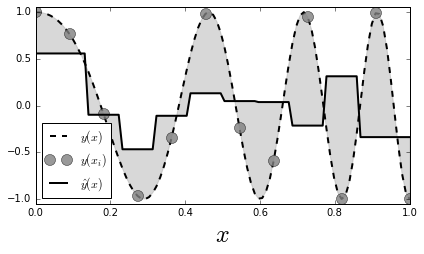

In [148]:
fig,ax=subplots()
_=ax.plot(xi,yi,'k--',lw=2,label=r'$y(x)$')
_=ax.plot(xin,y,'ko',lw=2,ms=11,color='gray',alpha=.8,label='$y(x_i)$')
_=ax.fill_between(xi.flat,yi.flat,knr.predict(xi).flat,color='gray',alpha=.3)
_=ax.plot(xi,knr.predict(xi),'k-',lw=2,label='$\hat{y}(x)$')
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.legend(loc=0)
fig.set_tight_layout(True)
#fig.savefig('fig-statistics/nonparametric_005.png')

 which produces the following corresponding [Figure](#fig:nonparametric_005).

<!-- dom:FIGURE: [fig-statistics/nonparametric_005.png, width=800 frac=0.85] This is the same as [Figure](#fig:nonparametric_004) except that here there are three nearest neighbors used to build the estimator.  <div id="fig:nonparametric_005"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_005"></div>

<p>This is the same as [Figure](#fig:nonparametric_004) except that here there are three nearest neighbors used to build the estimator.</p>
<img src="fig-statistics/nonparametric_005.png" width=800>

<!-- end figure -->


For this example, [Figure](#fig:nonparametric_005) shows that with
more nearest neighbors the fit performs poorly, especially towards the end of
the signal, where there is increasing variation, because the chirp is not
uniformly continuous.

Scikit-learn provides many tools for cross validation. The following code
sets up the tools for leave-one-out cross validation,

In [149]:
from sklearn.cross_validation import LeaveOneOut
loo=LeaveOneOut(len(xin))

 The `LeaveOneOut` object is an iterable that produces a set of
disjoint indices of the data --- one for fitting the model (training set)
and one for evaluating the model (testing set), as shown
in the next short sample,

In [150]:
pprint(list(LeaveOneOut(3)))

[(array([1, 2]), array([0])),
 (array([0, 2]), array([1])),
 (array([0, 1]), array([2]))]


 The next block loops over the disjoint sets of training and test
indicies iterates provided by the `loo` variable to evaluate
the estimated risk, which is accumulated in the `out` list.

In [151]:
out=[]
for train_index, test_index in loo:
    _=knr.fit(xin[train_index],y[train_index])
    out.append((knr.predict(xi[test_index])-y[test_index])**2)

print 'Leave-one-out Estimated Risk: ',np.mean(out),

Leave-one-out Estimated Risk:  1.03517136627


 The last line in the code above reports leave-one-out's estimated
risk.  

Linear smoothers of this type can be rewritten in using the following matrix,

$$
\mathscr{S} = \left[ \ell_i(x_j) \right]_{i,j}
$$

 so that

$$
\hat{\mathbf{y}} = \mathscr{S} \mathbf{y}
$$

   where $\mathbf{y}=\left[Y_1,Y_2,\ldots,Y_n\right]\in \mathbb{R}^n$
and $\hat{ \mathbf{y}
}=\left[\hat{y}(x_1),\hat{y}(x_2),\ldots,\hat{y}(x_n)\right]\in \mathbb{R}^n$.
This leads to a quick way to approximate leave-one-out cross validation as the
following,

$$
\hat{R}=\frac{1}{n}\sum_{i=1}^n\left(\frac{y_i-\hat{y}(x_i)}{1-\mathscr{S}_{i,i}}\right)^2
$$

 However, this does not reproduce the approach in the code above
because it assumes that each $\hat{y}_{(-i)}(x_i)$ is consuming one fewer
nearest neighbor than $\hat{y}(x)$.

We can get this $\mathscr{S}$ matrix from the `knr` object as in the following,

In [152]:
_= knr.fit(xin,y) # fit on all data
S=(knr.kneighbors_graph(xin)).todense()/float(knr.n_neighbors)

 The `todense` part reformats the sparse matrix that is
returned into a regular Numpy `matrix`. The following shows a subsection
of this $\mathcal{S}$ matrix,

In [153]:
print S[:5,:5]

[[ 0.33333333  0.33333333  0.33333333  0.          0.        ]
 [ 0.33333333  0.33333333  0.33333333  0.          0.        ]
 [ 0.          0.33333333  0.33333333  0.33333333  0.        ]
 [ 0.          0.          0.33333333  0.33333333  0.33333333]
 [ 0.          0.          0.          0.33333333  0.33333333]]


 The sub-blocks show the windows of the the `y` data that are being
processed by the nearest neighbor estimator. For example,

In [154]:
print np.hstack([knr.predict(xin[:5]),(S*y)[:5]])#columns match

[[ 0.55781314  0.55781314]
 [ 0.55781314  0.55781314]
 [-0.09768138 -0.09768138]
 [-0.46686876 -0.46686876]
 [-0.10877633 -0.10877633]]


 Or, more concisely checking all entries for approximate equality,

In [155]:
print np.allclose(knr.predict(xin),S*y)

True


 which shows that the results from the nearest neighbor
object and the matrix multiply match.

**Programming Tip.**

Note that because we formatted the returned $\mathscr{S}$ as a Numpy matrix, we
automatically get the matrix multiplication instead of default element-wise
multiplication in the `S*y` term.

 


## Kernel Regression

For estimating the probability density, we started with the histogram and moved
to the more general kernel density estimate. Likewise, we can also extend
regression from nearest neighbors to kernel-based regression using the
*Nadaraya-Watson* kernel regression estimator.  Given a bandwith $h>0$, the
kernel regression estimator is defined as the following,

$$
\hat{y}(x)=\frac{\sum_{i=1}^n K\left(\frac{x-x_i}{h}\right) Y_i}{\sum_{i=1}^n K \left( \frac{x-x_i}{h} \right)}
$$

 Unfortunately, Scikit-learn does not implement this
regression estimator; however, Jan Hendrik Metzen  makes a compatible
version available on `github.com`.

In [156]:
xin = np.linspace(0,1,20)[:,None]
y = cos(2*pi*(f0*xin+(BW/2.0)*xin**2)).flatten()

In [157]:
from kernel_regression import KernelRegression

 This code makes it possible to internally optimize over the bandwidth
parameter using leave-one-out cross validation by specifying a grid of
potential bandwidth values (`gamma`), as in the following,

In [158]:
kr = KernelRegression(gamma=np.linspace(6e3,7e3,500))
kr.fit(xin,y)

KernelRegression(gamma=6002.0040080160325, kernel='rbf')

 [Figure](#fig:nonparametric_006) shows the kernel estimator (heavy
black line) using the Gaussian kernel compared to the nearest neighbor
estimator (solid light black line). As before, the data points are shown as
circles. [Figure](#fig:nonparametric_006) shows that the kernel estimator can
pick out the sharp peaks that are missed by the nearest neighbor estimator.  

<!-- dom:FIGURE: [fig-statistics/nonparametric_006.png, width=800 frac=0.85] The heavy black line is the Gaussian kernel estimator. The light black line is the nearest neighbor estimator. The data points are shown as gray circles. Note that unlike the nearest neighbor estimator, the Gaussian kernel estimator is able to pick out the sharp peaks in the training data.  <div id="fig:nonparametric_006"></div> -->
<!-- begin figure -->
<div id="fig:nonparametric_006"></div>

<p>The heavy black line is the Gaussian kernel estimator. The light black line is the nearest neighbor estimator. The data points are shown as gray circles. Note that unlike the nearest neighbor estimator, the Gaussian kernel estimator is able to pick out the sharp peaks in the training data.</p>
<img src="fig-statistics/nonparametric_006.png" width=800>

<!-- end figure -->


Thus, the difference between nearest neighbor and kernel estimation is that the
latter provides a smooth moving averaging of points whereas the former provides
a discontinuous averaging. Note that kernel estimates suffer near the
boundaries where there is mismatch between the edges and the kernel
function. This problem gets worse in higher dimensions because the data
naturally drift towards the boundaries (this is a consequence of the *curse of
dimensionality*). Indeed, it is not possible to simultaneously maintain local
accuracy (i.e., low bias) and a generous neighborhood (i.e., low variance). One
way to address this problem is to create a local polynomial regression using
the kernel function as a window to localize a region of interest. For example,

$$
\hat{y}(x)=\sum_{i=1}^n K\left(\frac{x-x_i}{h}\right) (Y_i-\alpha - \beta x_i)^2
$$

 and now we have to optimize over the two linear parameters $\alpha$
and $\beta$. This method is known as *local linear regression*
[[loader2006local]](#loader2006local), [[hastie2013elements]](#hastie2013elements). Naturally, this can be
extended to higher-order polynomials. Note that these methods are not yet
implemented in Scikit-learn.

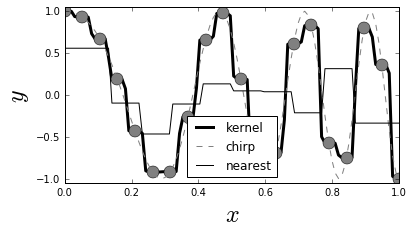

In [159]:
fig,ax=subplots()
#fig.set_size_inches((12,4))
_=ax.plot(xi,kr.predict(xi),'k-',label='kernel',lw=3)
_=ax.plot(xin,y,'o',lw=3,color='gray',ms=12)
_=ax.plot(xi,yi,'--',color='gray',label='chirp')
_=ax.plot(xi,knr.predict(xi),'k-',label='nearest')
_=ax.axis(ymax=1.1,ymin=-1.1)
_=ax.set_aspect(1/4.)
_=ax.axis(ymax=1.05,ymin=-1.05)
_=ax.set_xlabel(r'$x$',fontsize=24)
_=ax.set_ylabel(r'$y$',fontsize=24)
_=ax.legend(loc=0)
#fig.savefig('fig-statistics/nonparametric_006.png')

## Curse of Dimensionality

In [160]:
sys.displayhook= old_displayhook

<!-- # #ifdef SINGLE -->
<!-- TITLE:  Curse of Dimensionality -->
<!-- AUTHOR: Jose Unpingco -->
<!-- DATE: today -->
<!-- # #endif -->

The so-called curse of dimensionality occurs as we move into higher and higher
dimensions. The term was coined by Bellman in 1961 while he was studying
adaptive control processes. Nowadays, the term is vaguely refers to anything
that becomes more complicated as the number of dimensions increases
substantially. Nevertheless, the concept is useful for recognizing
and characterizing the practical difficulties of high-dimensional analysis and
estimation.

Consider the volume of an $n$-dimensional sphere,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
V_s(n,r)= \begin{cases}
   \pi^{n/2} \frac{r^n}{(n/2)!}              & \texttt{ if $n$ is even}  \\\
   2^n\pi^{(n-1)/2} \frac{r^{ (n-1) }}{(n-1)!}((n-1)/2)! & \texttt{ if $n$ is odd}
\end{cases} 
\label{_auto1} \tag{1}
\end{equation}
$$

 Further, consider the sphere $V_s(n,1/2)$ enclosed by an $n$
dimensional unit cube.  The volume of the cube is always equal to one, but
$\lim_{n\rightarrow\infty} V_s(n,1/2) = 0$. What does this mean? It means that
the volume of the cube is pushed away from its center, where the embedded
hypersphere lives.  Specifically, the distance from the center of the cube to
its vertices in $n$ dimensions is $\sqrt{n}/2$, whereas the distance from the
center of the inscribing sphere is $1/2$. This diagonal distance goes to
infinity as $n$ does. For a fixed $n$, the tiny spherical region at the center
of the cube has many long spines attached to it, like a hyper-dimensional sea
urchin or porcupine.

What are the consequences of this? For methods that rely on nearest
neighbors, exploiting locality to lower bias becomes intractable. For
example, suppose we have an $n$ dimensional space and a point near the
origin we want to localize around. To estimate behavior around this
point, we need to average the unknown function about this point, but
in a high-dimensional space, the chances of finding neighbors to
average are slim. Looked at from the opposing point of view, suppose
we have a binary variable, as in the coin-flipping problem. If we have
1000 trials, then, based on our earlier work, we can be confident
about estimating the probability of heads.  Now, suppose we have 10
binary variables.  Now we have $2^{ 10 }=1024$ vertices to estimate.
If we had the same 1000 points, then at least 24 vertices would not
get any data.  To keep the same resolution, we would need 1000 samples
at each vertex for a grand total of $1000\times 1024 \approx 10^6$
data points. So, for a ten fold increase in the number of variables,
we now have about 1000 more data points to collect to maintain the
same statistical resolution. This is the curse of dimensionality.

Perhaps some code will clarify this. The following code generates samples in
two dimensions that are plotted as points in [Figure](#fig:curse_of_dimensionality_001) with the inscribed circle in two
dimensions. Note that for $d=2$ dimensions,  most of the points are contained
in the circle.

In [161]:
import numpy as np
v=np.random.rand(1000,2)-1/2.

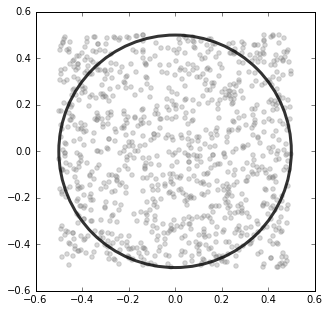

In [162]:
from matplotlib.patches import Circle
from matplotlib.pylab import subplots
fig,ax=subplots()
fig.set_size_inches((5,5))
_=ax.set_aspect(1)
_=ax.scatter(v[:,0],v[:,1],color='gray',alpha=.3)
_=ax.add_patch(Circle((0,0),0.5,alpha=.8,lw=3.,fill=False))
#fig.savefig('fig-statistics/curse_of_dimensionality_001.pdf')

<!-- dom:FIGURE: [fig-statistics/curse_of_dimensionality_001.pdf, width=800 frac=0.65] Two dimensional scatter of points randomly and independently uniformly distributed in the unit square. Note that most of the points are contained in the circle. Counter to intuition, this does not persist as the number of dimensions increases. <div id="fig:curse_of_dimensionality_001"></div> -->
<!-- begin figure -->
<div id="fig:curse_of_dimensionality_001"></div>

<p>Two dimensional scatter of points randomly and independently uniformly distributed in the unit square. Note that most of the points are contained in the circle. Counter to intuition, this does not persist as the number of dimensions increases.</p>
<img src="fig-statistics/curse_of_dimensionality_001.pdf" width=800>

<!-- end figure -->


 The next code block describes the core computation in
[Figure](#fig:curse_of_dimensionality_002). For each of the dimensions, we
create a set of uniformly distributed random variates along each dimension
and then compute how close each $d$ dimensional vector is to the origin.
Those that measure one half are those contained in the hypersphere. The
histogram of each measurment is shown in the corresponding panel in the
[Figure](#fig:curse_of_dimensionality_002). The dark vertical line shows the threshold value. Values to the left
of this indicate the population that are contained in the hypersphere. Thus,
[Figure](#fig:curse_of_dimensionality_002) shows that as $d$ increases,
fewer points are contained in the inscribed hypersphere. The following
code paraphrases  the content of [Figure](#fig:curse_of_dimensionality_002)

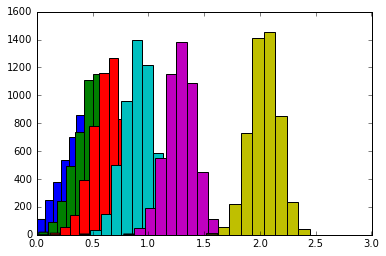

In [163]:
for d in [2,3,5,10,20,50]:
    v=np.random.rand(5000,d)-1/2.
    hist([np.linalg.norm(i) for i in v])

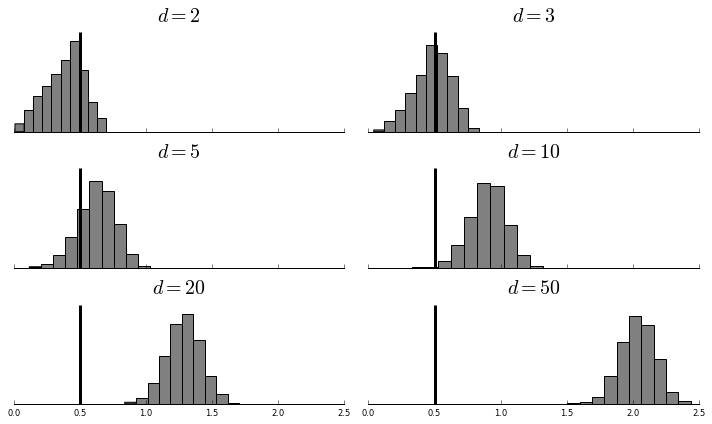

In [164]:
siz = [2,3,5,10,20,50]
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((10,6))
#fig.set_size_inches((10,8))
for ax,k in zip(axs.flatten(),siz):
    v=np.random.rand(5000,k)-1/2.
    _=ax.hist([np.linalg.norm(i) for i in v],color='gray',normed=True);
    _=ax.vlines(0.5,0,ax.axis()[-1]*1.1,lw=3)
    _=ax.set_title('$d=%d$'%k,fontsize=20)
    _=ax.tick_params(labelsize='small',top=False,right=False)
    _=ax.spines['top'].set_visible(False)
    _=ax.spines['right'].set_visible(False)
    _=ax.spines['left'].set_visible(False)
    _=ax.yaxis.set_visible(False)
    _=ax.axis(ymax=3.5)

fig.set_tight_layout(True)
#fig.savefig('fig-statistics/curse_of_dimensionality_002.pdf')

<!-- dom:FIGURE: [fig-statistics/curse_of_dimensionality_002.pdf, width=800 frac=0.95] Each panel shows the histogram of lengths of uniformly distributed $d$ dimensional random vectors. The population to the left of the dark vertical line are those that are contained in the inscribed hypersphere. This shows that fewer points are contained in the hypersphere with increasing dimension. <div id="fig:curse_of_dimensionality_002"></div> -->
<!-- begin figure -->
<div id="fig:curse_of_dimensionality_002"></div>

<p>Each panel shows the histogram of lengths of uniformly distributed $d$ dimensional random vectors. The population to the left of the dark vertical line are those that are contained in the inscribed hypersphere. This shows that fewer points are contained in the hypersphere with increasing dimension.</p>
<img src="fig-statistics/curse_of_dimensionality_002.pdf" width=800>

<!-- end figure -->


<!-- TODO: Additive models, "" -->
<!-- TODO: Local Regression Methods, p. 32 -->
<!-- TODO: Spline Methods, p. 32 -->